In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

<b> Example </b>

To demonstrate

\begin{align}
\underbrace{\text{Beta}(\mu | a+1, b)}_{posterior} \propto \underbrace{\text{Bern}(x = 1|\mu)}_{likelihood} \times \underbrace{\text{Beta}(\mu | a, b)}_{prior} 
\end{align}

after a **single** observation of $x=1$
- prior: a beta distribution
- likelihood: a binary random variable based on setting $\mu$ as prior
- posterior: only the values with a single observation of $x=1$ are kept as posterior

<b> Intuition </b>

- We derive a set of $\mu$ values by prior distribution
- Since the observation is $x=1$, a Bernoulli distribution with parameter $\mu$ generating a value $1$ indicates that $\mu$ is "reasonable" and consistant with the observation.
- We keep all "reasonable" $\mu$ as posterior. Posterior is what we have learned from the observation based on prior.


*Two plots on the left are based on simulation and two plots on the right are based on beta distribution.*

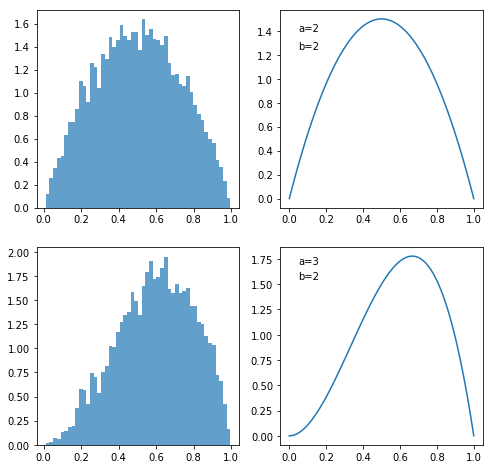

Based on simulation, posterior beta distribution has [a,b]=[2.886 1.962]


(0.5, 0.6)

In [2]:
x = np.linspace(0, 1, 100)

# generate 10,000 mu values from the prior distribution
prior = stats.beta.rvs(2, 2, size=10000)

# the likelihood follows bernoulli distribution with a given mu
likelihood = stats.bernoulli.rvs(prior, size=prior.shape)

posterior = (likelihood*prior)[(likelihood*prior)!=0]

fig, axes = plt.subplots(2, 2, figsize=(8,8))
axes[0,0].hist(prior, density=True, histtype='stepfilled', alpha=0.7, bins=50)
axes[0,1].plot(x, (stats.beta(2,2)).pdf(x))
axes[0,1].annotate("a={}".format(2), (0.05, 1.4))
axes[0,1].annotate("b={}".format(2), (0.05, 1.25))

axes[1,0].hist(posterior, density=True, histtype='stepfilled', alpha=0.7, bins=50)
axes[1,1].plot(x, (stats.beta(3,2)).pdf(x))
axes[1,1].annotate("a={}".format(3), (0.05, 1.7))
axes[1,1].annotate("b={}".format(2), (0.05, 1.55))
plt.show()
np.round(stats.beta.fit(posterior, floc=0, fscale=1)[:2],3)
print("Based on simulation, posterior beta distribution has [a,b]={}"\
      .format(np.round(stats.beta.fit(posterior, floc=0, fscale=1)[:2],3)))
stats.beta.mean(2,2), stats.beta.mean(3,2)